## Code for analyzing photometry data from NE and DA animals. 
Uses .pkl data from photometry and behavioral data from .parquet file. 

Load the functions from photometry_analysis.py file. Creates full dataframe which can be used in downstream functions. Use clear_memory to clear Session_cache

In [23]:
%load_ext autoreload
%autoreload 2
from photometry_analysis import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
behavior_df = load_filtered_behavior_data("MatchingPennies")
print(f"Loaded behavior data with {len(behavior_df)} rows")

Using parquet file: 345504 trials matching protocol='MatchingPennies', ignore=0
Loaded behavior data with 345504 rows


Plot average reward rate and computer confidence for all subjids over learning. Can adjust min_trials to exclude sessions from analysis. 

Filtering 36 subjects to 7 specified subjects
Analyzing 7 subjects
Processing JOA-M-0022...
  JOA-M-0022/20250131: Average reward rate = 0.266 (149 trials)
  JOA-M-0022/20250201: Average reward rate = 0.157 (117 trials)
  JOA-M-0022/20250203: Average reward rate = 0.314 (321 trials)
  JOA-M-0022/20250204: Average reward rate = 0.366 (170 trials)
  JOA-M-0022/20250205: Average reward rate = 0.328 (406 trials)
  JOA-M-0022/20250206: Average reward rate = 0.313 (308 trials)
  JOA-M-0022/20250207: Average reward rate = 0.318 (421 trials)
  JOA-M-0022/20250208: Average reward rate = 0.274 (308 trials)
  JOA-M-0022/20250210: Average reward rate = 0.345 (276 trials)
  JOA-M-0022/20250211: Average reward rate = 0.376 (291 trials)
  JOA-M-0022/20250212: Average reward rate = 0.363 (224 trials)
  JOA-M-0022/20250213: Average reward rate = 0.423 (284 trials)
  JOA-M-0022/20250214: Average reward rate = 0.455 (245 trials)
  JOA-M-0022/20250215: Average reward rate = 0.446 (379 trials)
  JOA-M-0022

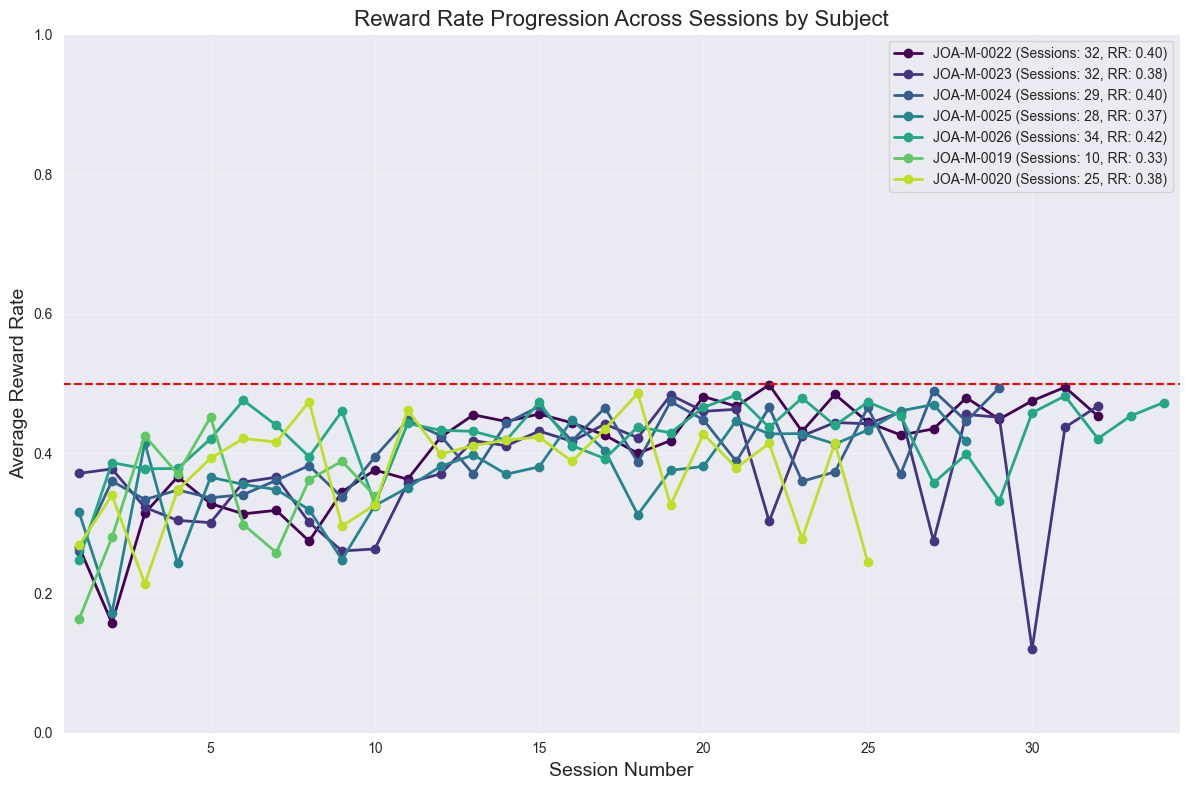

In [24]:
specific_subjects = [
    'JOA-M-0019',
    'JOA-M-0020',
    'JOA-M-0022',
    'JOA-M-0023',
    'JOA-M-0024',
    'JOA-M-0025',
    'JOA-M-0026'
]

analyze_group_reward_rates(behavior_df=behavior_df, subjids=specific_subjects)

Filtering 36 subjects to 7 specified subjects
Analyzing 7 subjects
Processing JOA-M-0022...
  JOA-M-0022/20250131: Average confidence = 7.606 (149 trials)
  JOA-M-0022/20250201: Average confidence = 6.431 (117 trials)
  JOA-M-0022/20250203: Average confidence = 4.876 (321 trials)
  JOA-M-0022/20250204: Average confidence = 2.143 (170 trials)
  JOA-M-0022/20250205: Average confidence = 6.410 (406 trials)
  JOA-M-0022/20250206: Average confidence = 3.557 (308 trials)
  JOA-M-0022/20250207: Average confidence = 4.550 (421 trials)
  JOA-M-0022/20250208: Average confidence = 4.375 (308 trials)
  JOA-M-0022/20250210: Average confidence = 2.777 (276 trials)
  JOA-M-0022/20250211: Average confidence = 2.876 (291 trials)
  JOA-M-0022/20250212: Average confidence = 1.296 (224 trials)
  JOA-M-0022/20250213: Average confidence = 1.434 (284 trials)
  JOA-M-0022/20250214: Average confidence = 1.654 (245 trials)
  JOA-M-0022/20250215: Average confidence = 1.448 (379 trials)
  JOA-M-0022/20250217: Ave

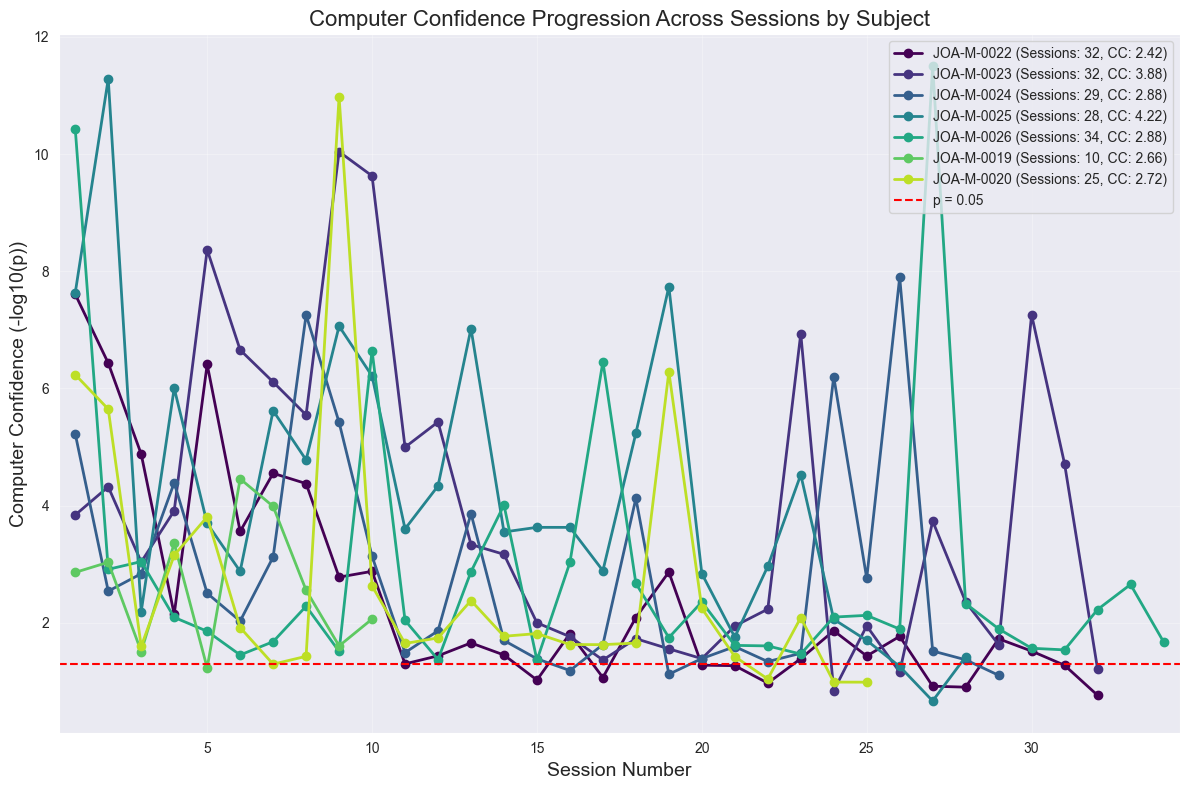

In [25]:
analyze_group_computer_confidence(behavior_df=behavior_df, subjids=specific_subjects)

Analyse photometry signal for a specified subjid ("JOA-M-0022") and sessid ("20250203"). Option to show heatmap of all trials and to split by win/loss

In [ ]:
# Analyze a specific subject and session
session_result = analyze_specific_session("JOA-M-0022", "20250212", show_heatmap=False, win_loss=False)

Similar to analyze_specific_session, but pooled visualization for all sessions of an animal. Use subjid and option for win/loss split. Option to show session average traces in blue gradient

In [ ]:
# Analyze all sessions for a specific subject and create pooled visualization
subject_pooled_result = pooled_results("JOA-M-0026", win_loss=True, show_session_traces=False, behavior_df=behavior_df)
#22, 23, 24, 25, 26; 20

Create a heatmap for all sessions of an animal, plotting high/low signal. Either sort by session date or average computer confidence of each session

In [ ]:
analyze_session_average_heatmap("JOA-M-0026", comp_conf=True, behavior_df=behavior_df)

Run to analyze all subjects and their respective sessions. Creates plots for individual sessions and pooled results for all subjects. 

In [ ]:
# Process all subjects and sessions
results, subject_list = all_results(win_loss=True)

Tool to select any subject and an individual session or pooled results. Option for win/loss split and heatmap (individual sessions only)

In [ ]:
select_and_visualize(show_heatmap=True, win_loss=True)

Calculates smoothed reward rate using moving window for each session for the selected animal. Then, all trials are divided into quartiles based on their smoothed reward rate, and average photometry signal of each quartile is plotted. Option for win/loss split

In [ ]:
analyze_reward_rate_quartiles("JOA-M-0026", win_loss=True, behavior_df=behavior_df)

Similar to reward_rate_quartiles, but smoothed computer confidence is calculated for each session/trial. 

In [ ]:
analyze_comp_confidence_quartiles("JOA-M-0026", win_loss=True, behavior_df=behavior_df)

Calculates the absolute difference between win and loss signal for each session and plots it with an ascending blue gradient. Sorted either by date or average computer confidence of the session. Option to turn of SEM for easier visualization. 

In [ ]:
analyze_session_win_loss_difference_gap("JOA-M-0026", comp_conf=False, sem=True, behavior_df=behavior_df) 
#Visualize the difference between the win and loss signal at each point. Option to have it sorted by day or by average computer confidence of each session. Option to deactivate SEM for clearer visualization. Option to use global DF to reduce memory use

Similar calculation of difference between win and loss signal per session. Creates heatmap of the difference between win and loss signal across the epoch for all sessions. Red = win > loss, blue = win < loss 

In [ ]:
analyze_session_win_loss_difference_heatmap("JOA-M-0026", comp_conf=True, behavior_df=behavior_df)

Plot with subplots for each session. Photometry data splot into win/loss with corresponding choice history plots underneath. 

In [ ]:
plot_per_session_win_loss("JOA-M-0025", behavior_df=behavior_df)

Divides all trials T0 into win and loss trials. Then, subdivision based on T-1, into win-->win, win-->loss, loss-->win, loss-->loss. Plots average photometry signal for T0 (effect of preceding win or loss) 

In [ ]:
analyze_previous_outcome_effect("JOA-M-0026", behavior_df=behavior_df, time_split=True)

Calculates and plots the % of trials that follow WSLS behavior. 50% expected for random choices

In [ ]:
analyze_win_stay_lose_switch("JOA-M-0026", behavior_df=behavior_df)

Looks at last loss trials (T0 loss where T+1 is win). Then, divides these trials based on the number of losses in a row, either 1, 2, 3, 4, or >=5. Plots average photometry data for each category. Option to skipped missed trials and to only display 1 and 5+ loss categories

In [ ]:
analyze_loss_streaks_before_win("JOA-M-0026", skipped_missed=True, only_1_5=True, behavior_df=behavior_df)

Takes all loss trials, and rearranges them based on the average photometry signal for different time windows. Then, creates quartiles based on rearranges trials.
Time windows: pre_cue (-0.75 to -0.25s), early_post (1-2s), late_post (3-5s). 
Calculates % of loss trials in each quartile that are followed by a switch in choice (L/R). 
Option to turn on/off plot_verification showing time window and sorted trials. 

In [ ]:
analyze_signal_quartiles_by_outcome("JOA-M-0026", signal_window='late_post', plot_verification=True, condition= 'win', behavior_df=behavior_df)
#see % of loss trials followed by switch in choice, for quartiles sorted based on photometry signal in different time windows. 
#Windows: pre_cue (-0.75 to -0.25), early_post (1-2s), late_post (3.5-4.5s)
#either look at switch after loss trial or after win trial. 

Calculate the general p(switch) following either win or loss trials


In [ ]:
analyze_switch_probabilities("JOA-M-0024", behavior_df=behavior_df)

Calculate the average p(switch) across each session based on moving average. Divides trials into quartiles based on average p(switch), then plots corresponding photometry signal. 

In [ ]:
analyze_switch_probability_quartiles("JOA-M-0026", win_loss=False, behavior_df=behavior_df)

In [ ]:
results = analyze_signal_state_effects_on_switching("JOA-M-0026", signal_window='pre_cue', condition='loss', behavior_df=behavior_df)